In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# SPRINT -1
# DATA PREPROCESSING

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
data = pd.read_csv("/content/drive/MyDrive/language  dataset/dataset.csv")

In [6]:
unique_languages = data['language'].unique()

# Print the unique languages
for lang in unique_languages:
    print(lang)

Estonian
Swedish
Thai
Tamil
Dutch
Japanese
Turkish
Latin
Urdu
Indonesian
Portugese
French
Chinese
Korean
Hindi
Spanish
Pushto
Persian
Romanian
Russian
English
Arabic


In [7]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


**LANGUAGE DISTRIBUTION**

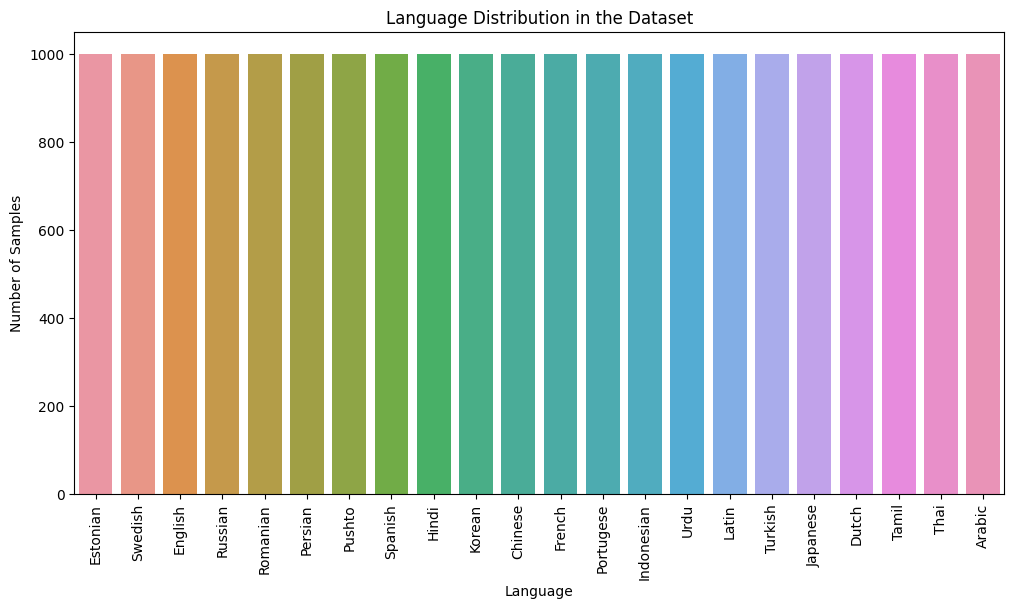

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples per language
language_counts = data['language'].value_counts()

# Create a bar chart to visualize class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.title('Language Distribution in the Dataset')
plt.xticks(rotation=90)
plt.show()


**LOWERCASING THE DATSET**

In [9]:
data['Text'] = data['Text'].str.lower()

TOKENIZING THE DATSET

In [10]:
data['Text'] = data['Text'].apply(lambda text: word_tokenize(text))

In [11]:
print(data.head())

                                                Text  language
0  [klement, gottwaldi, surnukeha, palsameeriti, ...  Estonian
1  [sebes, joseph, pereira, thomas, på, eng, the,...   Swedish
2  [ถนนเจริญกรุง, อักษรโรมัน, thanon, charoen, kr...      Thai
3  [விசாகப்பட்டினம், தமிழ்ச்சங்கத்தை, இந்துப், பத...     Tamil
4  [de, spons, behoort, tot, het, geslacht, halic...     Dutch


**CREATING STOPWORDS**


In [12]:
# Define stop word lists for each language
stop_words = {

    "swedish": set(nltk.corpus.stopwords.words("swedish")),
    "dutch": set(nltk.corpus.stopwords.words("dutch")),
    "turkish": set(nltk.corpus.stopwords.words("turkish")),
    "indonesian": set(nltk.corpus.stopwords.words("indonesian")),
    "portuguese": set(nltk.corpus.stopwords.words("portuguese")),
    "french": set(nltk.corpus.stopwords.words("french")),
    "chinese": set(nltk.corpus.stopwords.words("chinese")),
    "spanish": set(nltk.corpus.stopwords.words("spanish")),
    "romanian": set(nltk.corpus.stopwords.words("romanian")),
    "russian": set(nltk.corpus.stopwords.words("russian")),
    "english": set(nltk.corpus.stopwords.words("english")),
    "arabic": set(nltk.corpus.stopwords.words("arabic")),
    "estonian": {
        "ja", "ega", "või", "ning", "aga", "sest", "et", "kui",
        "olema", "saama", "oma", "tema", "see", "need", "nende",
    },
    "thai": {
        "และ", "หรือ", "ถ้า", "เพื่อ", "โดย", "แต่", "ซึ่ง",
        "เป็น", "ก็", "ไป", "ที่", "มี", "ใน", "คือ",
    },
    "tamil": {
        "உள்ள", "அவன்", "இந்த", "அவர்", "அது", "அந்த", "இது",
        "ஆனால்", "அந்தரம்", "இனி", "அவனுக்கு", "அவன்",
        "அந்தக்", "அந்தக்",
    },
    "japanese": {
        "と", "に", "は", "を", "が", "で", "の", "て",
        "た", "だ", "り", "ら", "な", "い", "など",
    },
    "latin": {
        "et", "cum", "in", "est", "non", "ad", "ex", "sed",
        "ut", "qui", "hoc", "sunt", "quia", "a", "ab",
    },
    "urdu": {
        "اور", "کی", "سے", "کا", "یا", "کے", "کو", "کی", "کیا", "کہ", "کی", "کے",
    },
    "korean": {
        "그", "그녀", "그것", "이", "저", "우리", "당신", "누구", "어떤", "무엇",
        "왜", "어떻게", "어디", "언제", "모든", "많은", "몇", "적은",
    },
    "hindi": {
        "और", "का", "के", "की", "है", "हैं", "को", "में",
        "से", "कर", "पर", "इस", "की", "एक", "होता", "कि",
    },
    "pushto": {
        "او", "څنګه", "هم", "زموږ", "يو", "خو", "د", "چې",
        "دغه", "دوی", "پر", "به", "لرې", "چه", "دا", "که",
    },
    "persian": {
        "و", "به", "در", "از", "با", "برای", "را", "که", "این", "است",
        "آن", "یک", "هم", "های", "شما", "ما", "می", "آنها", "من", "باشد",
    },
    "nan": set(),  # Placeholder for missing language
}





**REMOVING THE STOPWORDS**

In [13]:
for lang in stop_words:
    if lang in data.columns:
        data[lang] = data[lang].apply(lambda tokens: [word for word in tokens if word not in stop_words[lang]])


**CHECKING MISSING VALUES**

In [14]:
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Text        0
language    0
dtype: int64


In [15]:
missing_values = data.isnull().sum()
percentage_missing = (missing_values / len(data)) * 100
missing_data_summary = pd.DataFrame({
    'Column Name': data.columns,
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})
print("Missing Data Summary:")
print(missing_data_summary)

Missing Data Summary:
         Column Name  Missing Values  Percentage Missing
Text            Text               0                 0.0
language    language               0                 0.0


**CHECKING NULL VALUES**

In [16]:
null_values = data.isnull().sum()
print(null_values)

Text        0
language    0
dtype: int64
